In [1]:
import plot_top as pltt
%matplotlib inline
import numpy as np
import parameters as p
import matplotlib.pyplot as plt
from matplotlib import cm, colors
from collections.abc import Iterable
import collections
import six
from scipy import interpolate
import pandas as pd
from IPython.display import display, Math
import random as rand
import terrestrialplanet as tp
import thermal as therm
import topography as top
import rheology as rh
import inputs as ins
from mpl_tools import colorize
import matplotlib
from matplotlib.font_manager import FontProperties
from matplotlib import rc
# matplotlib.font_manager._rebuild()
rc('font',**{'family':'serif','serif':['CMU Serif Roman']}) # latex font for matplotlib
rc('text', usetex=True)
# np.seterr('raise')

# fig_path = '/space/cmg76/figs/' # office
fig_path = 'figs/' # laptop#
goodfig_path = 'latex/report-firstyr/figs/'

import pyshtools
import cartopy.crs as ccrs

In [50]:
lmax_data = 5##30  # spherical harmonic degree of Hoggard model
lmax_plot = 5##120  # spherical harmonic degree to use for plotting purposes
filename = 'benchmarks/venus_sphcoeffs.csv'#'../hoggard/NGS-2015-07-01303-s13.csv'#
sh = np.loadtxt(filename, delimiter=",", skiprows=1)
cilm = np.zeros((2, lmax_data+1, lmax_data+1))

for i in range(sh.shape[0]):
    l = int(sh[i,0])
    m = int(sh[i,1])
    coeff = sh[i,2]
    cilm[1, l, m] = coeff  # 1e3 to convert from km to m


# what convection? norm?
clm= pyshtools.SHCoeffs.from_array(cilm,lmax=lmax_data,normalization="ortho",csphase=-1)

/home/claire/anaconda3/lib/python3.7/site-packages/pyshtools/shclasses/shcoeffsgrid.py:1827: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


(1, 5)

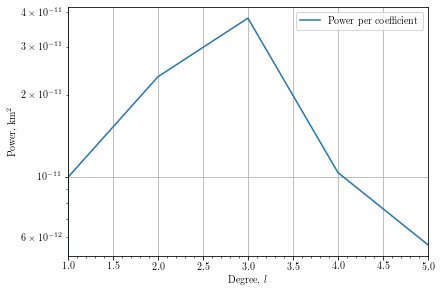

In [48]:
fig1, ax1 = clm.plot_spectrum(unit="per_lm",xscale='lin',yscale='log')

plt.ylabel("Power, km$^2$")
plt.xlabel("Degree, $l$")
plt.xlim(1,5)